In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
pokemon = pd.read_csv('pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [3]:
pokemon.shape

(807, 14)

In [4]:
gen_order = pokemon['generation_id'].value_counts().index

<AxesSubplot:xlabel='generation_id', ylabel='count'>

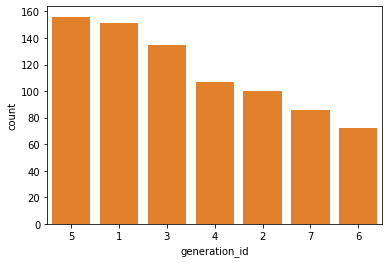

In [5]:
color = sb.color_palette()[1]
sb.countplot(data = pokemon, x = 'generation_id', color = color, order = gen_order )

In [6]:
sb.color_palette()[0]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

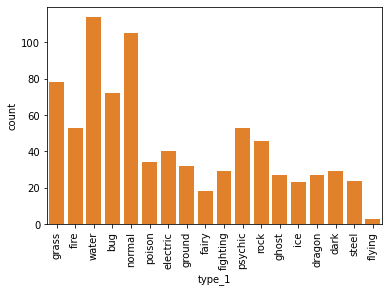

In [7]:
sb.countplot(data = pokemon, x = 'type_1', color = color)
plt.xticks(rotation = 90);

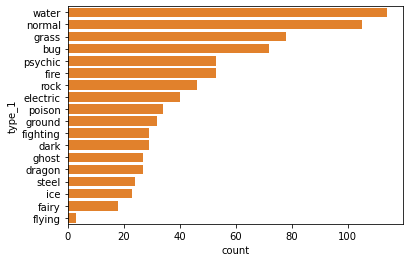

In [8]:
type_1order = pokemon['type_1'].value_counts().index
sb.countplot(data = pokemon, y = 'type_1', color = color, order = type_1order);

In [9]:
pokemon_types = pokemon.melt(id_vars = ['id', 'species'], 
                            value_vars = ['type_1', 'type_2'], 
                            var_name = 'type_level',
                            value_name = 'type')
pokemon_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


In [10]:
pokemon_types.shape

(1614, 4)

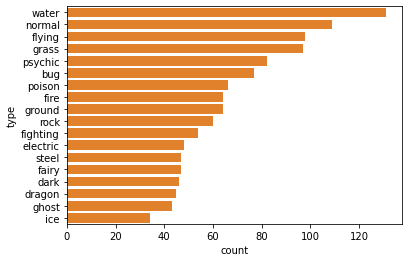

In [11]:
type_counts = pokemon_types['type'].value_counts()
type_order = pokemon_types['type'].value_counts().index
sb.countplot(data = pokemon_types, y = 'type', color = color, order = type_order);

In [12]:
max_prop = (type_counts[0])/(len(pokemon))
max_prop

0.1623296158612144

In [13]:
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

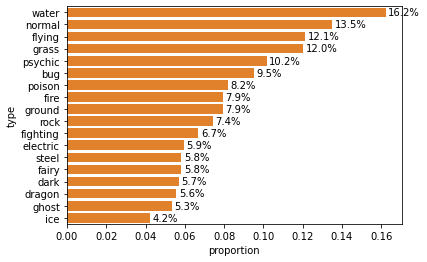

In [14]:
sb.countplot(data = pokemon_types, y = 'type', color = color, order = type_order)
plt.xticks(tick_props*len(pokemon), tick_names);
plt.xlabel('proportion')
for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(count*100/len(pokemon))
    plt.text(count+1, i, pct_string, va = 'center')

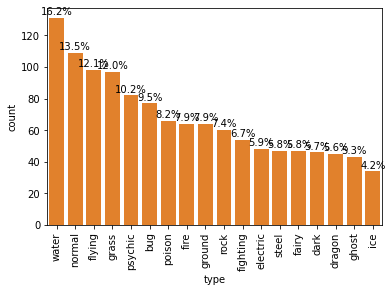

In [15]:
sb.countplot(data = pokemon_types, x = 'type', color = color, order = type_order)
locs, labels = plt.xticks(rotation = 90)
for loc, label in zip(locs, labels):
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(count*100/len(pokemon))
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

In [16]:
locs, labels

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'water'),
  Text(1, 0, 'normal'),
  Text(2, 0, 'flying'),
  Text(3, 0, 'grass'),
  Text(4, 0, 'psychic'),
  Text(5, 0, 'bug'),
  Text(6, 0, 'poison'),
  Text(7, 0, 'fire'),
  Text(8, 0, 'ground'),
  Text(9, 0, 'rock'),
  Text(10, 0, 'fighting'),
  Text(11, 0, 'electric'),
  Text(12, 0, 'steel'),
  Text(13, 0, 'fairy'),
  Text(14, 0, 'dark'),
  Text(15, 0, 'dragon'),
  Text(16, 0, 'ghost'),
  Text(17, 0, 'ice')])

In [17]:
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
fire         64
ground       64
rock         60
fighting     54
electric     48
steel        47
fairy        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [18]:
131/1212

0.10808580858085809

In [19]:
na_counts = pokemon.isna().sum()

C:\AGUS\uSER\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


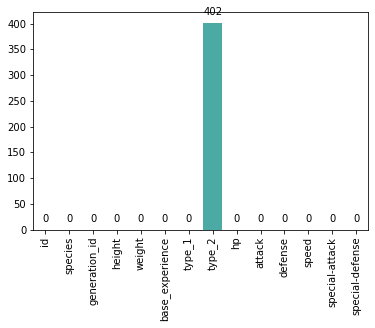

In [20]:
sb.barplot(na_counts.index.values, na_counts)
plt.xticks(rotation = 90)
for i in range (na_counts.shape[0]):
    count = na_counts[i]
    plt.text(i, count+30, count, ha = 'center', va = 'top')

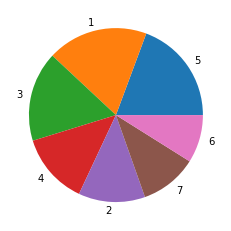

In [21]:
sorted_values = pokemon['generation_id'].value_counts()
plt.pie(sorted_values, labels = sorted_values.index);

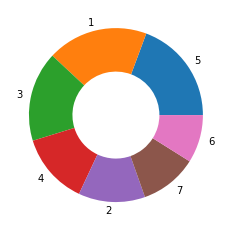

In [22]:
sorted_values = pokemon['generation_id'].value_counts()
plt.pie(sorted_values, labels = sorted_values.index, wedgeprops = {'width':0.5});

## HISTOGRAMS

(array([ 31.,  93., 163., 159., 128., 115.,  81.,  26.,   6.,   5.]),
 array([  5. ,  20.5,  36. ,  51.5,  67. ,  82.5,  98. , 113.5, 129. ,
        144.5, 160. ]),
 <BarContainer object of 10 artists>)

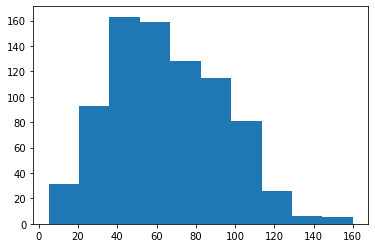

In [23]:
plt.hist(data = pokemon, x = 'speed')

(array([  6.,  25.,  21.,  72.,  66.,  97.,  53., 106.,  64.,  64.,  69.,
         46.,  52.,  29.,  18.,   8.,   5.,   1.,   4.,   1.]),
 array([  5.  ,  12.75,  20.5 ,  28.25,  36.  ,  43.75,  51.5 ,  59.25,
         67.  ,  74.75,  82.5 ,  90.25,  98.  , 105.75, 113.5 , 121.25,
        129.  , 136.75, 144.5 , 152.25, 160.  ]),
 <BarContainer object of 20 artists>)

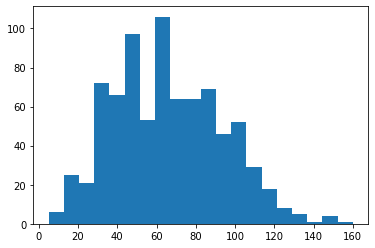

In [24]:
plt.hist(data = pokemon, x = 'speed', bins = 20)

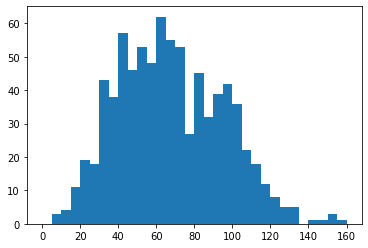

In [25]:
bins = np.arange(0, pokemon['speed'].max()+5, 5)
plt.hist(data = pokemon, x='speed', bins = bins);

C:\AGUS\uSER\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='speed', ylabel='Density'>

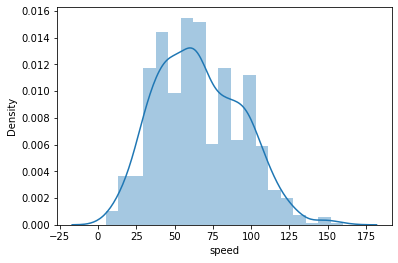

In [26]:
sb.distplot(pokemon['speed'])

C:\AGUS\uSER\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='speed', ylabel='Density'>

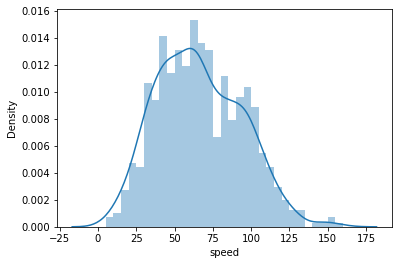

In [27]:
bins = np.arange(0, pokemon['speed'].max()+5, 5)
sb.distplot(pokemon['speed'], bins = bins)

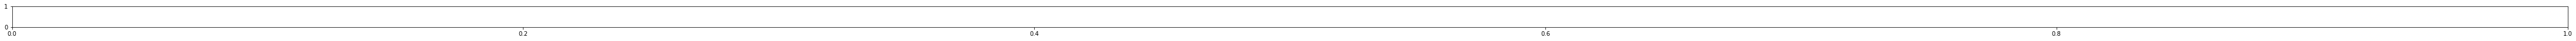

In [37]:
fig = plt.figure()
ax = fig.add_axes([10.25,10.25,10.125,0.125])

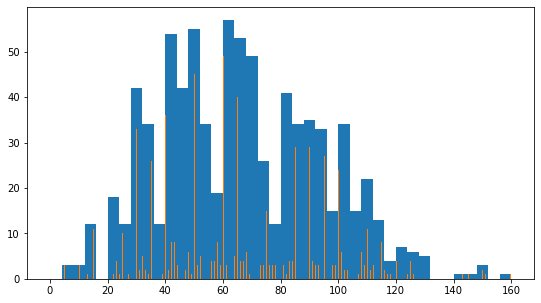

In [38]:
# Resize the chart, and have two plots side-by-side
# set a larger figure size for subplots
plt.figure(figsize = [20, 5]) 

# histogram on left, example of too-large bin size
# 1 row, 2 cols, subplot 1
plt.subplot(1, 2, 1) 
bins = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

# histogram on right, example of too-small bin size
#plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bins = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bins);

(0.0, 6.0)

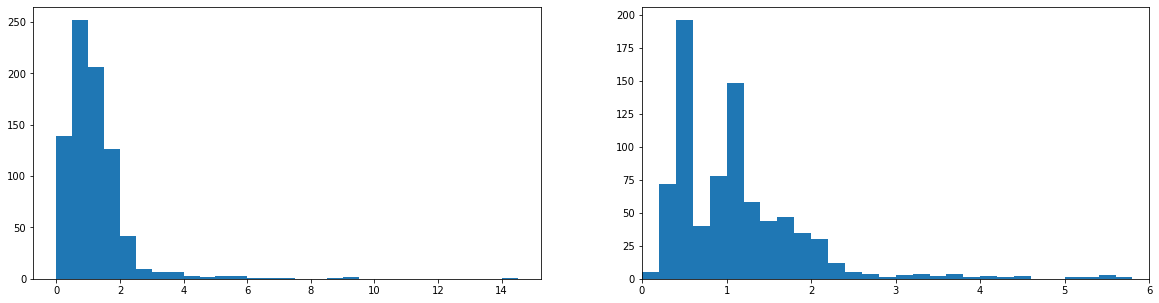

In [47]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
bin_edges = np.arange(0,pokemon['height'].max()+0.5,0.5)
plt.hist(pokemon['height'], bins = bin_edges);

plt.subplot(1,2,2)
bin_edges = np.arange(0,pokemon['height'].max()+0.5,0.2)
plt.hist(pokemon['height'], bins = bin_edges);
plt.xlim([0,6])

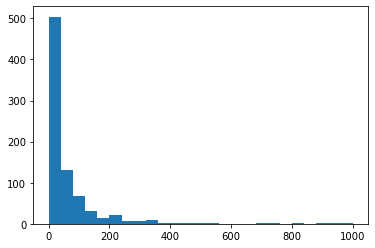

In [55]:
bins = np.arange(0,pokemon['weight'].max()+40,40)
plt.hist(pokemon['weight'], bins = bins);
#plt.xscale('log')

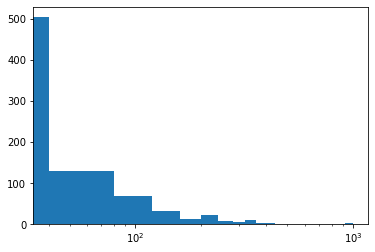

In [52]:
bins = np.arange(0,pokemon['weight'].max()+40,40)
plt.hist(pokemon['weight'], bins = bins);
plt.xscale('log')

In [53]:
pokemon['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

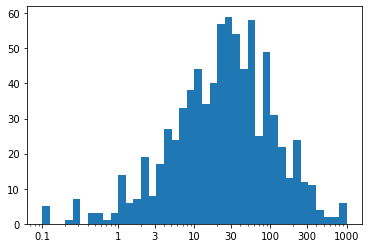

In [62]:
bins = 10**np.arange(-1,3+0.1,0.1)
ticks = [0.1,1,3,10,30,100,300,1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(pokemon['weight'], bins = bins);
plt.xscale('log')
plt.xticks(ticks, labels);